# Synthèse des indicateurs de suivi de l’épidémie COVID-19  


## Prévision de l'évolution des décès de la covid-19 suivant des paramètres bien déterminés.

### Import des modules et packages ML

In [243]:
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Appel d'API pour réccuperer les données

In [244]:
url = "https://www.data.gouv.fr/fr/datasets/r/5c4e1452-3850-4b59-b11c-3dd51d7fb8b5"
s = requests.get(url)
s.encoding = s.apparent_encoding

s = s.text
donnes_general = pd.read_csv(StringIO(s), delimiter=',',low_memory=False)
donnes_general.head(2)
donnes_general = donnes_general.drop(['date','dep','lib_reg','incid_dchosp','lib_dep', 'cv_dose1', 'tx_pos', 'tx_incid', 'pos', 'pos_7j','reg_incid_rea', 'reg_rea'], axis=1, errors='ignore')

donnes_general = donnes_general.fillna(0)
donnes_general

,reg,TO,R,hosp,rea,rad,dchosp,incid_hosp,incid_rea,incid_rad
0,84,0.062612,0.00,2,0,1,0,0.0,0.0,0.0
1,84,0.132379,0.00,2,0,1,0,1.0,0.0,0.0
2,84,0.155635,0.00,2,0,1,0,0.0,0.0,1.0
3,84,0.173524,0.00,4,0,1,0,3.0,0.0,0.0
4,84,0.212880,0.00,8,1,2,0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
49586,6,0.000000,0.79,0,0,1274,131,0.0,0.0,0.0
49587,6,0.000000,0.00,0,0,1274,131,0.0,0.0,0.0
49588,6,0.000000,0.00,0,0,1274,131,0.0,0.0,0.0
49589,6,0.000000,0.00,0,0,1274,131,0.0,0.0,0.0


## Un petit apperçu des données

In [248]:
donnes_general.describe()

,reg,TO,R,hosp,rea,rad,dchosp,incid_hosp,incid_rea,incid_rad
count,49591.000000,49591.000000,49591.000000,49591.000000,49591.000000,49591.000000,49591.000000,49591.000000,49591.000000,49591.000000
mean,52.653465,0.491747,0.173219,182.039443,27.011333,1770.671170,411.214454,10.144179,1.814926,8.037043
std,28.195655,0.416909,0.418192,266.944385,50.473851,2720.834562,597.463107,19.730352,4.216316,14.441111
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.143204,0.000000,27.000000,3.000000,267.000000,60.000000,0.000000,0.000000,0.000000
50%,52.000000,0.429293,0.000000,85.000000,10.000000,785.000000,183.000000,3.000000,0.000000,3.000000
75%,76.000000,0.722222,0.000000,218.000000,28.000000,2066.000000,508.000000,11.000000,2.000000,9.000000
max,94.000000,5.500000,4.350000,3281.000000,855.000000,21589.000000,4570.000000,404.000000,96.000000,222.000000


In [249]:
pd.crosstab(donnes_general['reg'], donnes_general['dchosp'], normalize=True, margins=True).T * 100

reg,1,2,3,4,6,11,24,27,28,32,44,52,53,75,76,84,93,94,All
dchosp,,,,,,,,,,,,,,,,,,,
0,0.018148,0.000000,0.068561,0.127039,0.030247,0.004033,0.058478,0.064528,0.042346,0.004033,0.044363,0.040330,0.012099,0.149221,0.211732,0.157287,0.038313,0.016132,1.086891
1,0.004033,0.022181,0.098808,0.076627,0.000000,0.004033,0.022181,0.006049,0.038313,0.008066,0.014115,0.022181,0.028231,0.098808,0.479926,0.038313,0.038313,0.004033,1.004214
2,0.002016,0.000000,0.010082,0.020165,0.018148,0.004033,0.016132,0.022181,0.008066,0.002016,0.014115,0.010082,0.010082,0.030247,0.352887,0.020165,0.028231,0.022181,0.590833
3,0.000000,0.016132,0.004033,0.040330,0.010082,0.008066,0.014115,0.018148,0.010082,0.006049,0.004033,0.010082,0.006049,0.070577,0.096792,0.038313,0.024198,0.020165,0.397250
4,0.002016,0.006049,0.002016,0.004033,0.006049,0.006049,0.018148,0.014115,0.006049,0.000000,0.010082,0.010082,0.004033,0.068561,0.058478,0.036297,0.034280,0.002016,0.288359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.000000,0.000000,0.000000,0.000000,0.000000,0.008066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008066
4565,0.000000,0.000000,0.000000,0.000000,0.000000,0.006049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006049
4566,0.000000,0.000000,0.000000,0.000000,0.000000,0.002016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002016


## Modéle ML

In [250]:
donnes_general = donnes_general.sample(1000) 

In [273]:
X = donnes_general[['TO', 'R', 'hosp', 'rea', 'rad']]
y = donnes_general['dchosp']


In [274]:
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:>

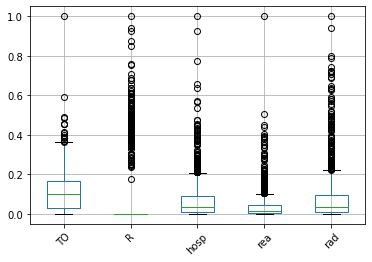

In [275]:
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(X)
pd.DataFrame(df_minmax, columns=X.columns, index= X.index).boxplot(rot=45)

In [276]:
X = df_minmax #Features
# y Target


In [277]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1/2)
print(y_test.describe())
print('---------------')
y_train.describe()

count     500.00000
mean      417.09600
std       617.21735
min         0.00000
25%        49.00000
50%       193.00000
75%       502.00000
max      4475.00000
Name: dchosp, dtype: float64
---------------


count     500.000000
mean      430.692000
std       604.774518
min         0.000000
25%        60.000000
50%       198.000000
75%       545.750000
max      3829.000000
Name: dchosp, dtype: float64

## Arbre de prédiction

In [281]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [282]:
MAEs=[]
max_deph = list (range (2, 20) )
max_deph.append(None)

print(max_deph)

for depth in max_deph :
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    MAEs.append(mae)

MAEs

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None]


[150.56281125839695,
 94.15201549834916,
 76.81949137913037,
 72.97695445553508,
 76.42333725815665,
 75.08941386012592,
 75.7533581460047,
 80.77020986423278,
 77.20535042016807,
 80.23190461760463,
 80.0868822775264,
 80.43655238095238,
 78.96915238095238,
 79.1546,
 82.10726666666666,
 78.25733333333334,
 79.475,
 79.642,
 79.642]

In [283]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree_OFF = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_OFF.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

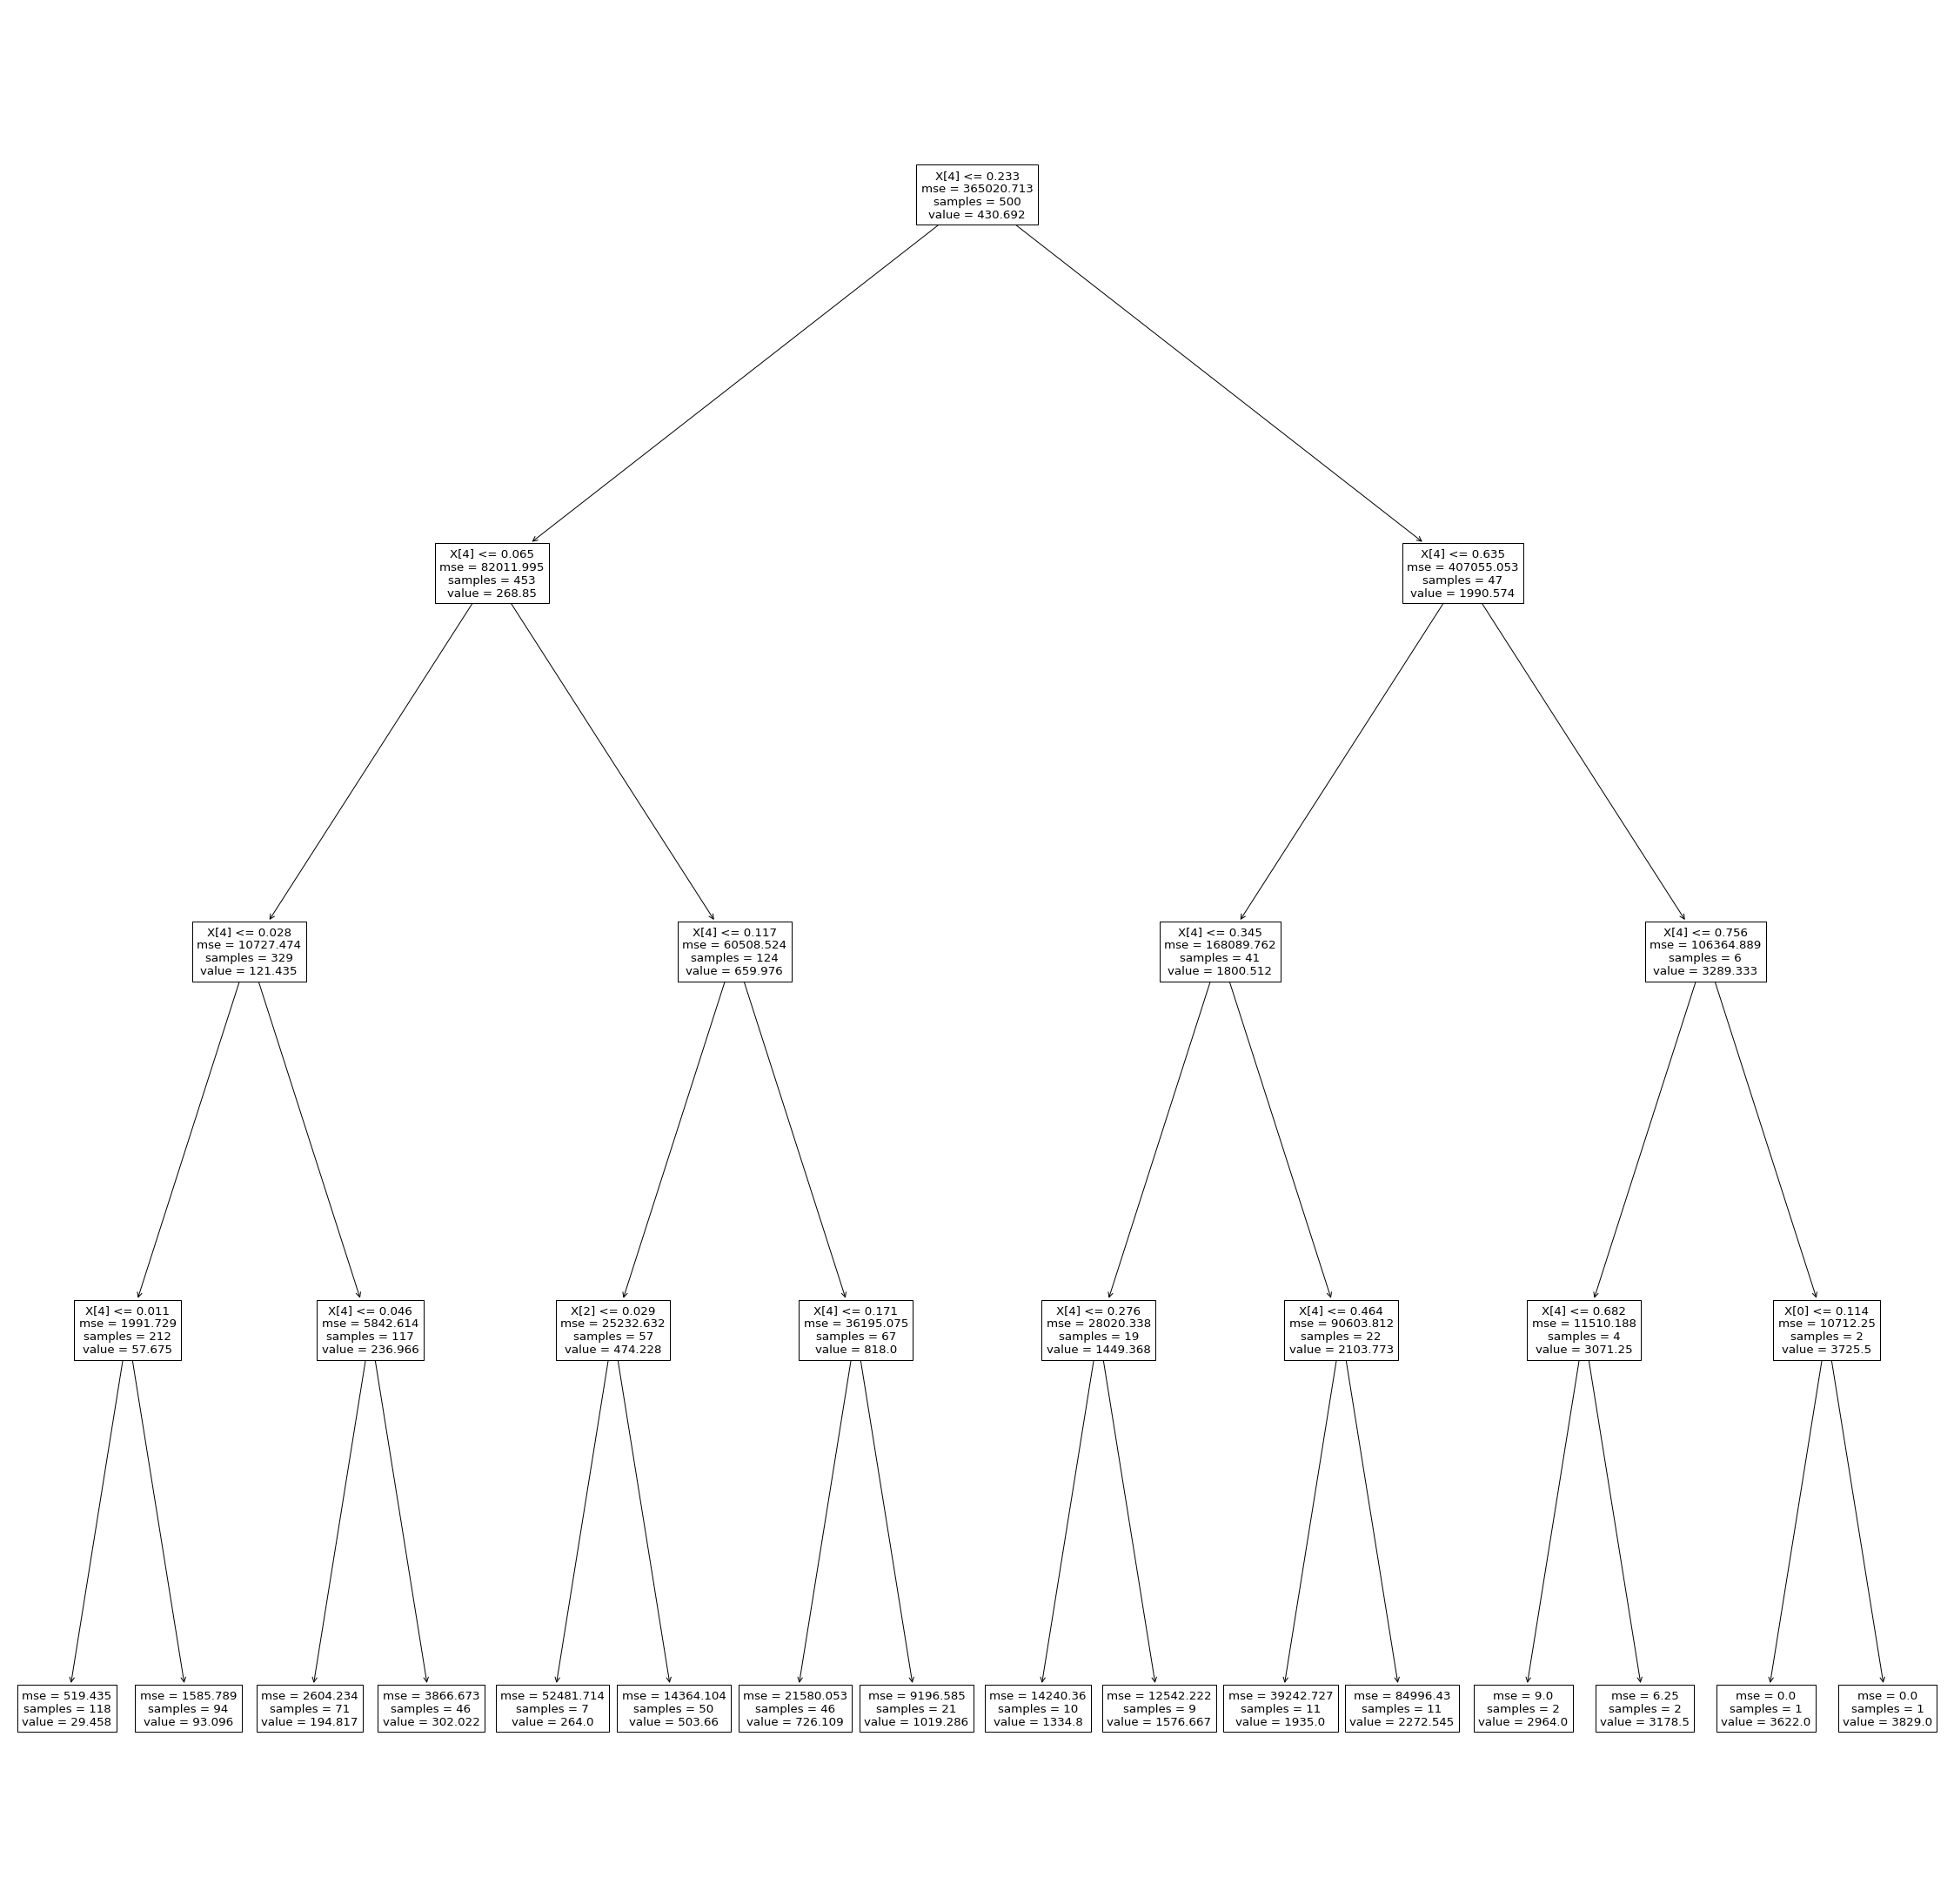

In [284]:
plt.figure(figsize = (40, 40))
tree_covid = plot_tree(tree_OFF)

In [ ]:
# from sklearn.tree import export_text
tree_rules = export_text(tree_OFF, feature_names=X_train.columns.values.tolist())
print(tree_rules)